[View in Colaboratory](https://colab.research.google.com/github/sqlwu/ML/blob/master/wine_classification.ipynb)

In [0]:
from sklearn.datasets import load_wine #匯入資料
wine = load_wine()

In [34]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


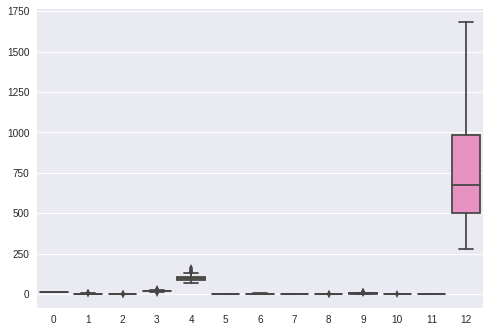

In [36]:
sns.boxplot(data=wine.data)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fixed_wine = scaler.fit_transform(wine.data)

#標準化目的 :
#○ 讓變數間關係更容易觀察
#○ 平衡變數間影響力, 使預測可能更為準確

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


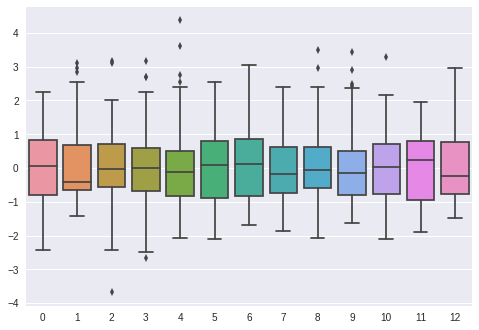

In [38]:
sns.boxplot(data=fixed_wine)

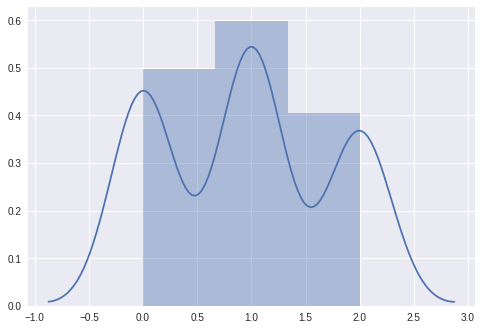

In [39]:
sns.distplot(wine.target)

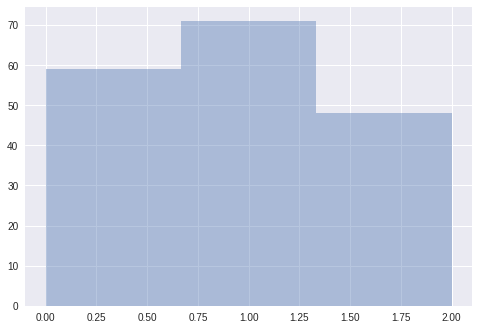

In [40]:
sns.distplot(wine.target, kde=False)

In [0]:
import pandas as pd
df_data = pd.DataFrame(data = fixed_wine, columns = wine.feature_names)

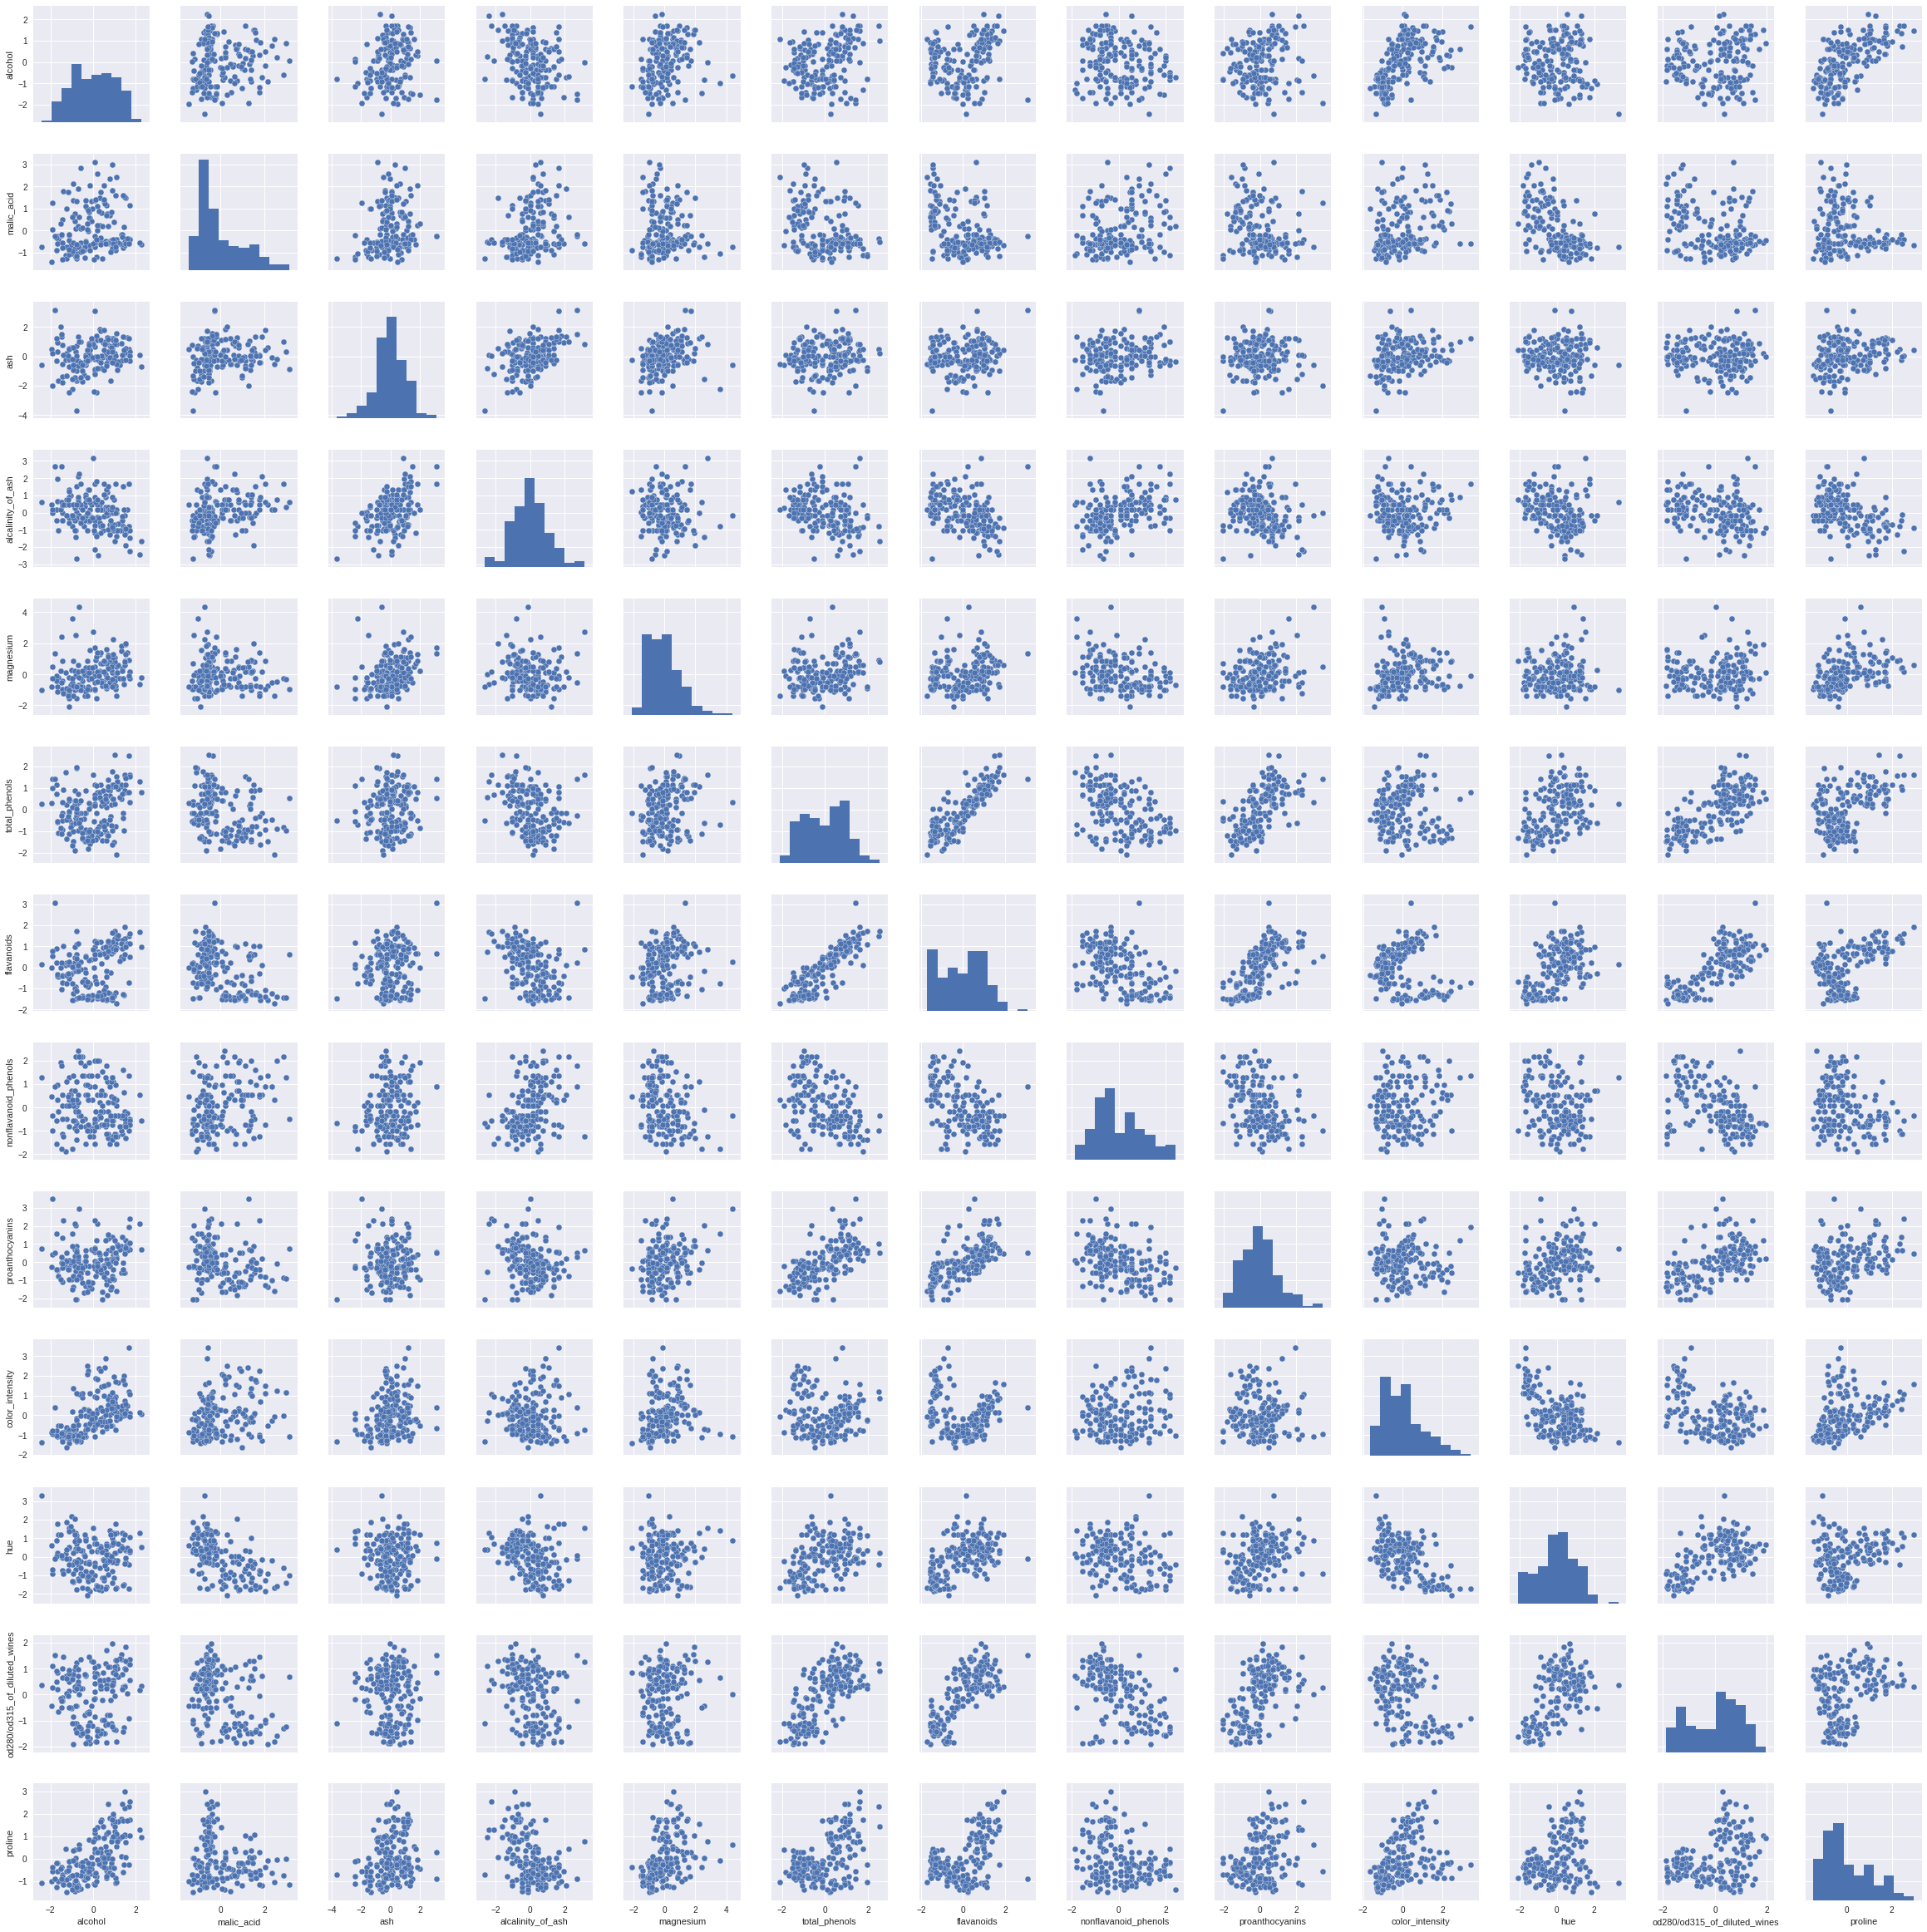

In [42]:
sns.pairplot(df_data)

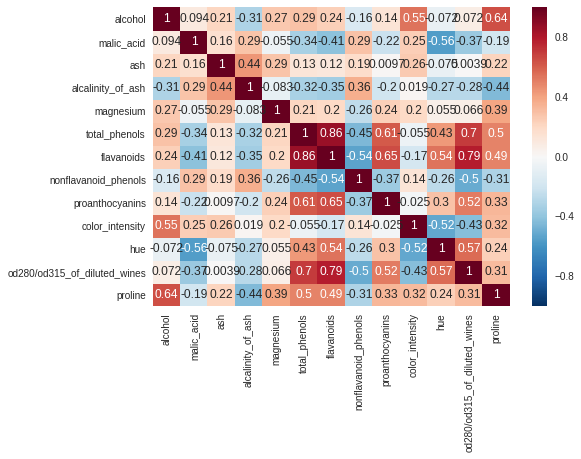

In [43]:
corr = df_data.corr()
sns.heatmap(corr, annot=True) #annot 表示是否顯示數值

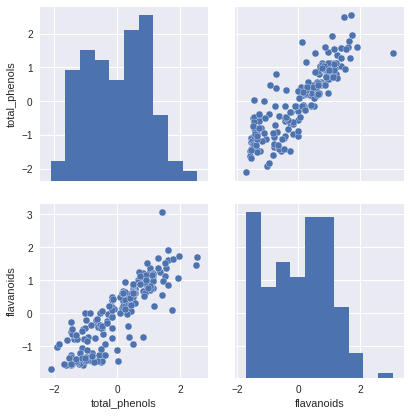

In [44]:
cols = ['total_phenols', 'flavanoids']
sns.pairplot(df_data[cols], size = 3.0)

In [45]:
df_target = pd.DataFrame(data = wine.target, columns =['class'])
df_data = pd.concat([df_data , df_target ], axis=1)
print(df_data)

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
5    1.481555   -0.517367  0.305159          -1.289707   0.860705   
6    1.716255   -0.418624  0.305159          -1.469878  -0.262708   
7    1.308617   -0.167278  0.890014          -0.569023   1.492625   
8    2.259772   -0.625086 -0.718336          -1.650049  -0.192495   
9    1.061565   -0.885409 -0.352802          -1.049479  -0.122282   
10   1.358028   -0.158301 -0.243142          -0.448909   0.369212   
11   1.382733   -0.768712 -0.170035          -0.809251  -0.332922   
12   0.925685   -0.544297  0.158946          -1.049479  -0.754202   
13   2.160950   -0.544297  0.08583

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


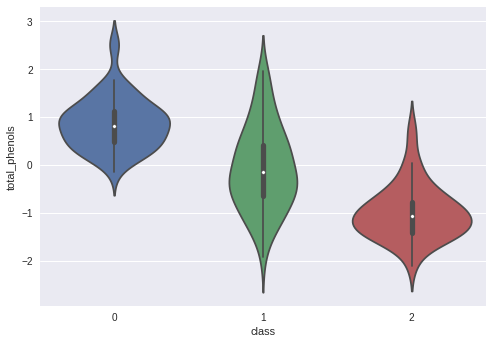

In [46]:
sns.violinplot(x='class', y='total_phenols', data=df_data)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fixed_wine, wine.target, test_size=0.2)

In [0]:
from sklearn import ensemble 
model = ensemble.RandomForestClassifier()

In [0]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [50]:
from sklearn import metrics
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))
print("confusion matirx:\n", metrics.confusion_matrix(y_test, pred))

accuracy:0.97
confusion matirx:
 [[ 9  0  0]
 [ 1 16  0]
 [ 0  0 10]]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))
print("confusion matirx:\n", metrics.confusion_matrix(y_test, pred))

accuracy:0.97
confusion matirx:
 [[13  0  0]
 [ 1 15  0]
 [ 0  0  7]]


In [52]:
from sklearn import tree #使用決策樹ＭＯＤＥＬ
model = tree.DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)#訓練參數 與 訓練標籤
pred = model.predict(X_test)
from sklearn import metrics
print("MAE:%.2f"% metrics.mean_absolute_error(y_test, pred))#測試答案 預測結果
print("R2:%.2f"% metrics.r2_score(y_test, pred))
 
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))
print("confusion matirx:\n", metrics.confusion_matrix(y_test, pred))

MAE:0.11
R2:0.68
accuracy:0.92
confusion matirx:
 [[12  0  1]
 [ 2 14  0]
 [ 0  0  7]]


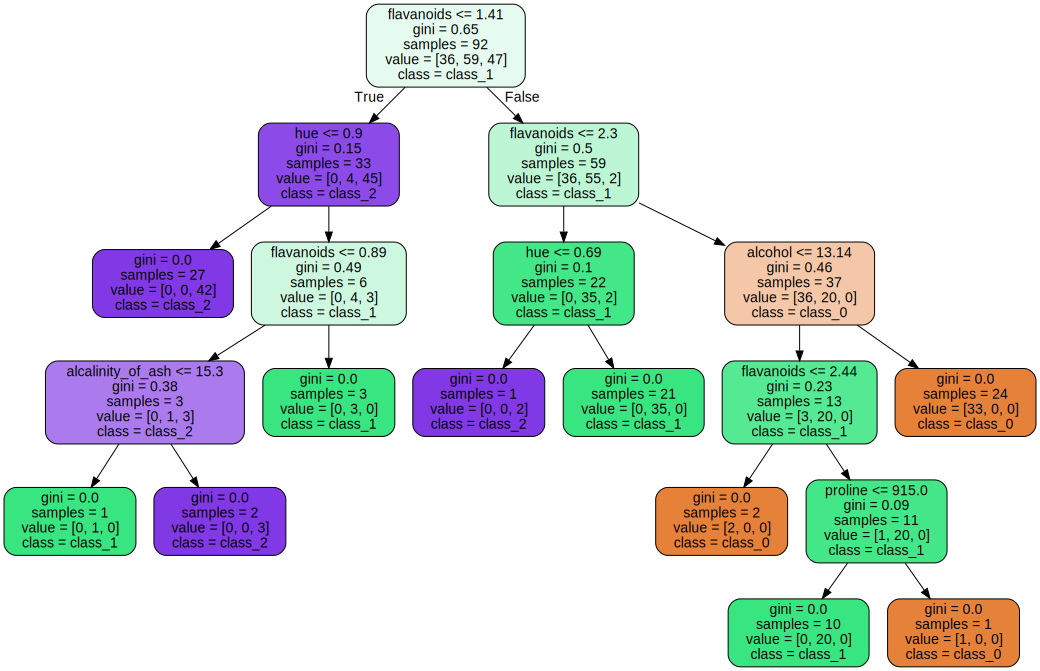

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as graph
tree_data = export_graphviz(estimator, out_file=None, 
                feature_names = wine.feature_names,
                class_names = wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(tree_data)
graph
